In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve

#Load the data 
train=pd.read_csv('train.csv')

#All features, that do not require further preprocessing: 
#['Type', 'Age', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee']
feature_cols=['Type', 'Age', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee']

#Define y and X
y=train.AdoptionSpeed
X_unscaled=train[feature_cols]
#Scale all features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_unscaled)
X=pd.DataFrame(X_scaled)
#set train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


C:\Users\Judith\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
#Define the hyperparameter that is going to be tuned and set the range for possible values
hyperparameter='min_samples_split'
hyperparam_range=[int(x) for x in np.linspace(start = 2, stop = 101, num = 100)]

#Create the validation curve
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(random_state=0),
                                X = X_train, y = y_train, 
                                param_name = hyperparameter, 
                                scoring="accuracy", 
                                param_range = hyperparam_range, cv = 3)

#Calculate scores that will be plotted
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plots


## interesting reads:

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/



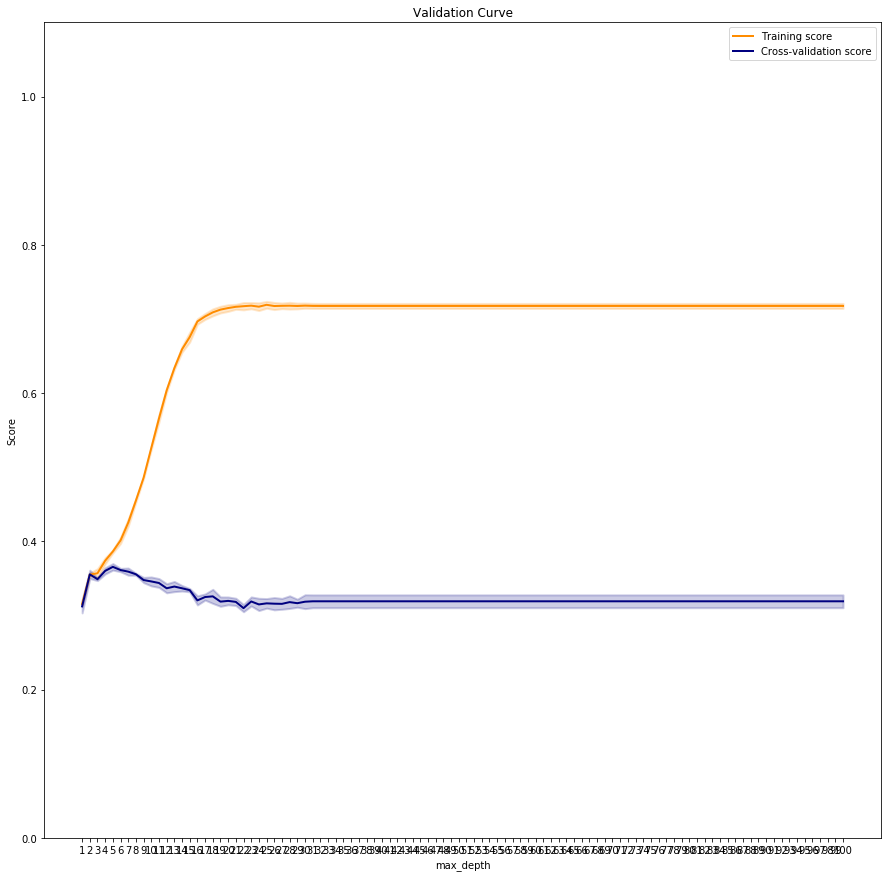

<Figure size 432x288 with 0 Axes>

In [11]:
#Plot the scores
plt.figure(figsize=(15,15))
plt.title("Validation Curve")
plt.xlabel(hyperparameter)
plt.xticks(np.arange(min(hyperparam_range), max(hyperparam_range)+1, 1), fontsize=10)
plt.ylabel("Score")
plt.yticks(fontsize=10)
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(hyperparam_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(hyperparam_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(hyperparam_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(hyperparam_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#Save the figure
plt.savefig('Hyperparameter ' + hyperparameter)

#Print out the quadratic weighted kappa score
#print(cohen_kappa_score(y_pred, y_test, weights='quadratic'))